Loan status prediction 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/loan.csv')

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.shape

(614, 13)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(480, 13)

In [ ]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Data Visualization

In [ ]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [ ]:
df = df.replace(to_replace='3+',value=4)

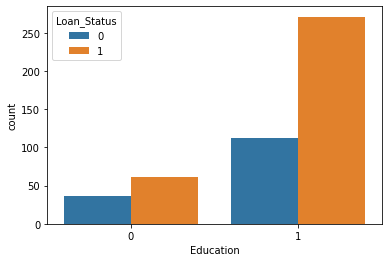

In [ ]:
sns.countplot(x = 'Education',hue ="Loan_Status",data=df)

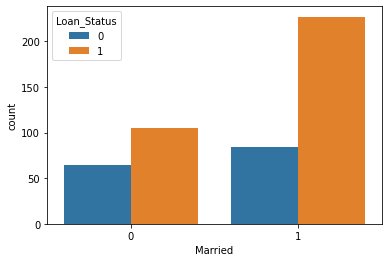

In [ ]:
sns.countplot(x ='Married',hue = 'Loan_Status',data = df)

In [ ]:
df.replace({"Married":{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},"Education":{'Graduate':1,'Not Graduate':0}},inplace = True) 

In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
x = df.drop(columns=['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']


In [ ]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=2)

In [ ]:
print(x_test)
print(y_test)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
205       0        0          0          0              0             4408   
549       1        1          0          1              0             2785   
513       1        1          0          1              0             2130   
415       0        0          0          1              0             2995   
271       1        1          0          1              0            11146   
..      ...      ...        ...        ...            ...              ...   
201       1        0          2          1              0             4923   
345       1        1          0          1              0             2499   
607       1        1          2          0              0             3987   
543       1        1          1          0              0             2239   
469       1        1          0          1              0             4333   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Training the model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print(training_data_accuracy)

0.7786458333333334


In [ ]:
x_test_prediction  = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print(test_data_accuracy)

0.8125


In [ ]:
input_data = (0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1)
a = np.asarray(input_data)
a = a.reshape(1,-1)
prediction = classifier.predict(a)
print(prediction)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
